In [19]:
import pandas as pd
import datascience 
import numpy as np
from scipy.stats import norm
#import matplotlib.pyplot as plt

#import matplotlib
#matplotlib.use('TkAgg')  # O puedes usar 'Qt5Agg'
#import matplotlib.pyplot as plt

%matplotlib inline


In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/fundatosudea/example_lab/main/DataSet/DataOptometria.csv",sep=";")
df

,Ano,CodigoDP
0,2018,H524
1,2018,H251
2,2018,H353
3,2018,H524
4,2018,H524
...,...,...
31307,2022,H522
31308,2022,H470
31309,2022,H448
31310,2022,H524


In [21]:
# Suponiendo que 'data' es tu DataFrame y 'H1' es una de las columnas
# Aquí tienes un ejemplo de cómo podría ser tu DataFrame
data = pd.DataFrame(df["CodigoDP"])

# Definir una función para realizar el bootstrap
def bootstrap(data, code, n=2000):
    sample_means = []
    for _ in range(n):
        sample = data.sample(frac=0.2, replace=True)
        sample_means.append(sample[sample['CodigoDP'] == code].shape[0])
    print(len(sample))
    return np.array(sample_means), len(sample)

valuesH522,_ = bootstrap(data,code="H522")
#valuesH101,_2 = bootstrap(data,code="H101")

6262


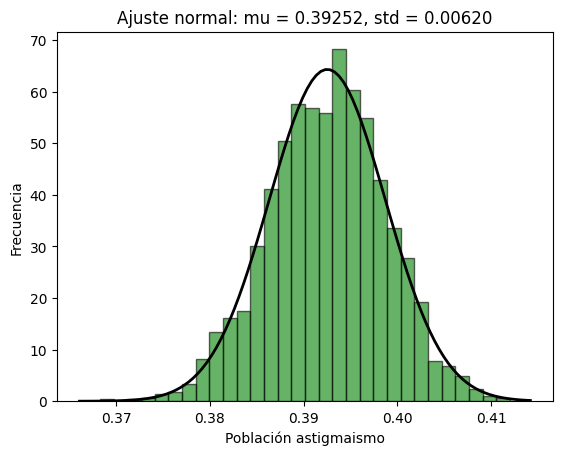

In [23]:
plt.figure()
mu, std = norm.fit(valuesH522/_)
# Crea el histograma de los datos
plt.hist(valuesH522/_, bins=30, density=True, alpha=0.6, color='g')

# Crea la PDF con la media y desviación estándar calculadas
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Dibuja la PDF sobre el histograma
plt.plot(x, p, 'k', linewidth=2)
title = "Ajuste normal: mu = {:.5f}, std = {:.5f}".format(mu, std)
plt.title(title)
plt.xlabel("Población astigmaismo")
plt.ylabel("Frecuencia")
plt.show()